2*sqrt(-x**2/(exp((x - 10)*(x + 10)) + 1) + 100)*cos(2*x) + (x**3*exp((x - 10)*(x + 10))/(exp((x - 10)*(x + 10)) + 1)**2 - x/(exp((x - 10)*(x + 10)) + 1))*sin(2*x)/sqrt(-x**2/(exp((x - 10)*(x + 10)) + 1) + 100)
<function _lambdifygenerated at 0x7f8fd74c4a60>


<string>:2: RuntimeWarning: overflow encountered in exp
<string>:2: RuntimeWarning: overflow encountered in exp
<string>:2: RuntimeWarning: overflow encountered in multiply
<string>:2: RuntimeWarning: overflow encountered in square
<string>:2: RuntimeWarning: invalid value encountered in true_divide
<string>:2: RuntimeWarning: overflow encountered in exp
<string>:2: RuntimeWarning: overflow encountered in multiply
<string>:2: RuntimeWarning: overflow encountered in square
<string>:2: RuntimeWarning: invalid value encountered in true_divide
<string>:2: RuntimeWarning: overflow encountered in power


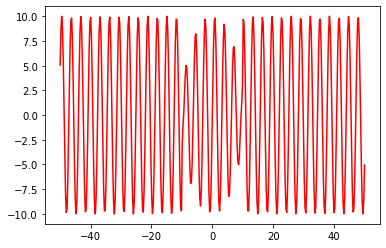

array([0.00720498])

In [195]:
import sympy as sp
import numpy as np
import math
import matplotlib.pyplot as plt

x = sp.Symbol('x')

def napravi_parabolu(a, b, c):
    f = a * x **2 + b * x + c
    return f

def napravi_bombon(h, b, c, y, r):
    f = sp.sin(h * x) * sp.sqrt(r**2-(x-y)**2 / (1 + sp.exp(b*(x-(c + y)) * (x+(c-y)))))
    return f

def napravi_sinc(a, b, c):
    return a*sp.sin(b*(x-c)) / (b*(x-c))

def analiziraj_K(f, t):
    f0 = sp.lambdify(x, f, 'numpy')
    
    fder = f.diff(x)
    print(fder)
    f1 = sp.lambdify(x, fder, 'numpy')
    print(f1)
    f1(np.array([0, 1, 7]))

    fderder = fder.diff(x)

    f2 = sp.lambdify(x, fderder, 'numpy')

    K = (f2(np.array([t]))) / math.pow(1 + (f1(np.array([t]) )**2), 3 / 2)
    
    x_val = np.linspace(-50, 50, 400)
    y_val0 = f0(x_val)
    y_val1 = f1(x_val)
    y_val2 = f2(x_val)
    plt.plot(x_val, y_val0, 'r') # plotting t, a separately 
   # plt.plot(x_val, y_val1, 'b') # plotting t, b separately 
    #plt.plot(x_val, y_val2, 'g') # plotting t, c separately 
    plt.show()
    
    return abs(K)

#analiziraj_K(napravi_parabolu(1, 2, 3), 5)
analiziraj_K(napravi_bombon(2, 1, 10, 0, 10), 5)

# Prikaz krivulja

## Sinc

0.5*cos(0.5*x - 30.0)/(0.5*x - 30.0) - 0.000555555555555556*sin(0.5*x - 30.0)/(0.0166666666666667*x - 1)**2
<function _lambdifygenerated at 0x7f8fd7230d90>


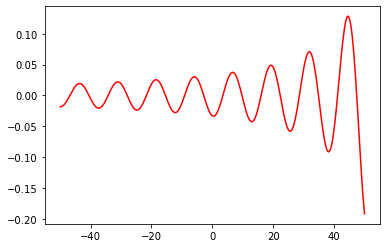

array([0.00586567])

In [140]:
analiziraj_K(napravi_sinc(1, 0.5, 60), 5)

0.25*cos(0.25*x + 15.0)/(0.25*x + 15.0) - 0.00111111111111111*sin(0.25*x + 15.0)/(0.0166666666666667*x + 1)**2
<function _lambdifygenerated at 0x7f8fd7230d90>


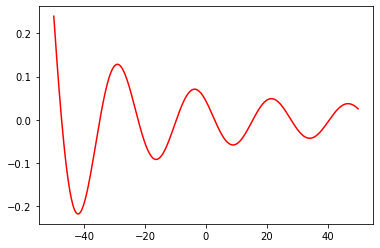

array([0.00237408])

In [138]:
analiziraj_K(napravi_sinc(1, 0.25, -60), 5)

## Lorenziana

In [149]:
def napravi_lorenzianu(a, b):
    return a/(1+(x-b)**2)

5*(50 - 2*x)/((x - 25)**2 + 1)**2
<function _lambdifygenerated at 0x7f8fd77f79d8>


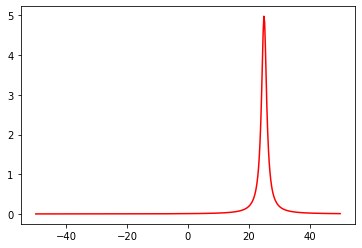

array([0.00018595])

In [150]:
analiziraj_K(napravi_lorenzianu(5, 25), 5)

## Kame Hame Ha

In [164]:
def napravi_kamehameha(a, b, d, f, g):
    return a * sp.sqrt( (x + b) + d) * sp.sin(f * (x + g))

11.1344061359374*sqrt(0.0181488203266788*x + 1)*cos(0.3*x + 1.5) + 0.336793894008995*sin(0.3*x + 1.5)/sqrt(0.0181488203266788*x + 1)
<function _lambdifygenerated at 0x7f8fd74ab9d8>


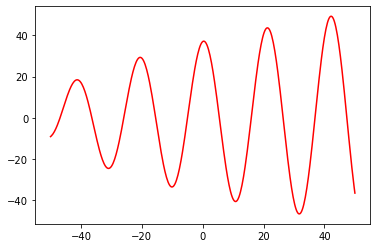

array([0.0004487])

In [177]:
analiziraj_K(napravi_kamehameha(5, 55, 0.1, 0.3, 5), 5)

## Sine Gaussian function

In [200]:
def napravi_sine_gaussian(a, b, c, d, f):
    return a * sp.exp(-(x + b)**2/c) * sp.sin(d * (x + f))

40*(-x/15 - 5/3)*exp(-(x + 25)**2/30)*sin(0.5*x) + 20.0*exp(-(x + 25)**2/30)*cos(0.5*x)
<function _lambdifygenerated at 0x7f8fd77be378>


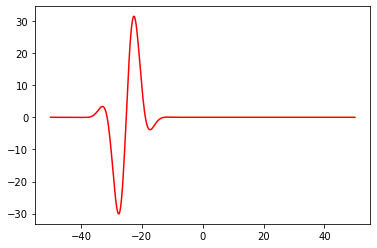

array([1.42485142e-11])

In [223]:
analiziraj_K(napravi_sine_gaussian(40, 25, 30, 0.5, 0), 5)

50*(-2*x/15 - 10/3)*exp(-(x + 25)**2/15)*sin(0.5*x + 2.5) + 25.0*exp(-(x + 25)**2/15)*cos(0.5*x + 2.5)
<function _lambdifygenerated at 0x7f8fd75deb70>


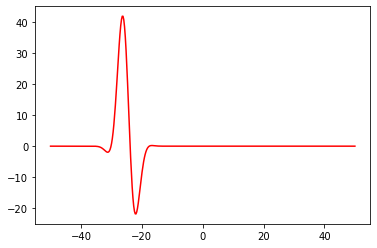

array([7.05330353e-24])

In [203]:
analiziraj_K(napravi_sine_gaussian(50, 25, 15, 0.5, 5), 5)

50*(-x/25 - 1)*exp(-(x + 25)**2/50)*sin(x) + 50*exp(-(x + 25)**2/50)*cos(x)
<function _lambdifygenerated at 0x7f8fd715eae8>


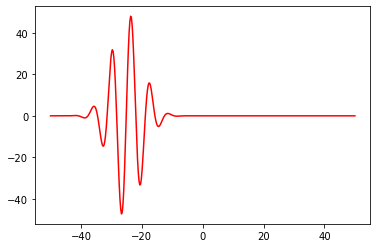

array([8.10508266e-07])

In [204]:
analiziraj_K(napravi_sine_gaussian(50, 25, 50, 1, 0), 5)

-x*exp(-x**2/200)*sin(0.5*x)/2 + 25.0*exp(-x**2/200)*cos(0.5*x)
<function _lambdifygenerated at 0x7f8fd73d5378>


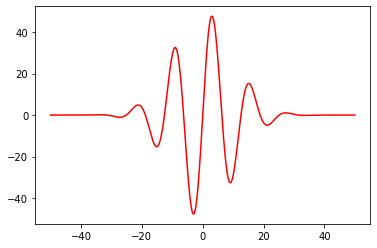

array([0.00073117])

In [215]:
analiziraj_K(napravi_sine_gaussian(50, 0, 200, 0.5, 0), 5)

-x*exp(-x**2/200)*sin(x)/2 + 50*exp(-x**2/200)*cos(x)
<function _lambdifygenerated at 0x7f8fd73ecae8>


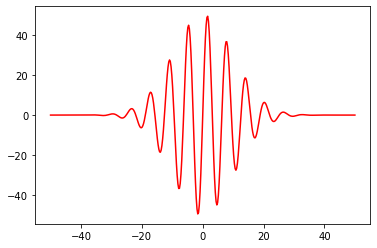

array([0.01311621])

In [216]:
analiziraj_K(napravi_sine_gaussian(50, 0, 200, 1, 0), 5)

-x*exp(-x**2/500)*sin(0.5*x)/25 + 5.0*exp(-x**2/500)*cos(0.5*x)
<function _lambdifygenerated at 0x7f8fd73ecae8>


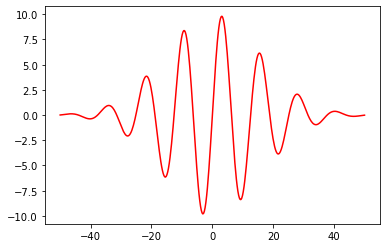

array([0.01944375])

In [217]:
analiziraj_K(napravi_sine_gaussian(10, 0, 500, 0.5, 0), 5)

-x*exp(-x**2/200)*sin(0.5*x)/2 + 25.0*exp(-x**2/200)*cos(0.5*x)
<function _lambdifygenerated at 0x7f8fd6f57268>


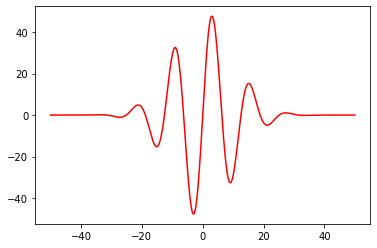

array([0.00073117])

In [220]:
analiziraj_K(napravi_sine_gaussian(50, 0, 200, 0.5, 0), 5)